# Energy App Project

## 1. Project Description:

Electric utilities recently enjoyed access to rich data about their residential customers due to the
widespread adoption of smart meters. In the European Union, Member States have committed to
rolling out almost 200 million smart meters by 2020. As of 2015, 57.1 million residential customers had advanced metering infrastructure (AMI) installations in the U.S., which accounts for 43.3% of all residential
customers.

An AMI installation includes smart meters which measure and record electricity usage every
hour at a minimum. Therefore, customers with smart meters can make more informed decisions regarding the
timing as well as the quantity of their consumption. The electric utilities can modify consumer
demand through demand side management (DSM) programs offering financial incentives or education
inducing behavioral change. Federal Energy Regulatory Commission estimates
that 60% of the DSM programs' benefits will be due to time-based pricing strategies, whereby the
utilities may vary the electricity price depending on the time of the day in order to encourage their
customers to shift their demand from peak to off-peak hours. Therefore, many countries such as Spain and Ireland switched to default time-of-use (TOU) pricing for residential electricity consumers. In California, San Diego Gas & Electric (SDG&E) began moving its customers in March of this year, and Southern California Edison (SCE) and Pacific Gas & Electric (PG&E) were given until October 2020 in order to prepare their billing systems. 

If TOU customers shift their usage to lower cost times, they can lower their bills and utilities can see lower peak demand. If they shift their usage to lower cost time periods when solar and wind are abundant, they will not only lower their bills, they will also use cleaner energy (https://www.utilitydive.com/news/california-utilities-prep-nations-biggest-time-of-use-rate-roll-out/543402/).  However, the benefits of time-of-use pricing in terms of bill reductions and carbon dioxide emissions highly depend on how a particular household responds to the new pricing scheme. The features of the household like appliance portfolio in the house, the size of the house, the number of people living in the house can affect the response of the household to the new prices. Also, the regional characteristics such as the temperature change in the region would affect the response of the household to TOU pricin.  This response can either increase or decrease the electricity bill for the household. Some households maintaining their electricity usage during peak times might have higher electricity bills under TOU pricing. Similarly, a household might increase or decrease its carbon dioxide emissions due to electricity consumption switching from a traditional flat-rate or tiered pricing to TOU pricing because the electricity generator portfolio in the region and more specifically, which generators supply electricity at the time of consumption determines the emissions level of a household. 

When California soon switches to time-of-use pricing for all residential electricity consumers, the consumers will need to decide whether to keep the time-of-use pricing or opt out. In this case, an application which predicts the household's electricity consumption under the new pricing scheme, and hence its new electricity bill and carbon dioxide emissions is an invaluable tool for millions of residential electricity consumers. To come up with an accurate predictor, we would need to use the following data sets:

(1) The households's historical electricity consumption data under the old pricing scheme, 
(2) The appliances in the household, 
(3) the demographics of the household, 
(4) The historical temperature data in the location of the household, 
(5) The electricity generator portfolio in the region where the household is located, 
(6) The historical hourly electricity generation data of the generators in the region.    

Data sets (4), (5) and (6) are publicly available. The energy app will obtain the data sets (2) and (3) as customer inputs by asking customers about the appliance portfolio and demographics of the household. Thanks to the industry-led effort, residential electricty consumers can download and/or share their consumption data with third-party applications (http://www.greenbuttondata.org/residential.html) and the largest electric utility in California, PG&E, built a system where the customer can authorize a company to access their PG&E account data. The transfer is handled automatically and repeatedly using standards-based Application Programming Interfaces (APIs) (https://www.pge.com/en_US/residential/save-energy-money/analyze-your-usage/your-usage/view-and-share-your-data-with-smartmeter/reading-the-smartmeter/share-your-data/third-party-companies/third-party-companies.page). 


**How can we design an application which accurately predicts the consumption of a household, its electricity bill and carbon dioxide emissions under a new pricing scheme before accessing the data sets (1), (2) and (3) to be provided by the customer?**

Before the decision to roll out smart meters and switch to default TOU pricing for residential consumers, many field experiments were conducted all over the world to measure the response of households to TOU pricing. One of these field experiments was conducted in Ireland and this data was published for researchers after the experiment, which I obtained from the Irish Commission for Energy Regulation (CER) (https://www.smart-energy.com/regional-news/europe-uk/ireland-s-smart-meter-trial-data-published-for-researchers/):

## Data Description:

(1) The data includes the electricity consumption and survey data of more than 3000 households collected by the Commission for Energy Regulation (CER), the independent regulator of electricity
and natural gas sectors in Ireland, through the Smart Metering Electricity Customer Behavior
Trials. The electricity consumption data of all participant homes was recorded in
30-minute intervals through two periods: the benchmark period and the test period. The benchmark
period lasted from July 14, 2009 to December 31, 2009, during which all participants were
charged a rate of 14.1 cents/kWh (in 2009 Euros). The test period was from January 1st, 2010
to December 31st 2010, during which several TOU tariffs and DSM stimuli were tested. There are
five test groups in the dataset: groups A, B, C and D, which pay a 
at rate during the benchmark period and a TOU tariff during the test period; group E, which is the control group paying the at rate of 14.1 cents per kWh during both the benchmark and the test periods. More detailed description is provided here: http://www.ucd.ie/issda/data/commissionforenergyregulationcer/#

(2) and (3) The participants of the field experiment were also invited to take part in a telephone assisted
survey about the demographic characteristics of their household, the ownership and use of electrical
appliances, investments in energy efficiency and expectations from the trial. 83% of the field experiment participants also participated in the survey.

(4) Historical temperature data during the time of the experiment for Dublin airport is publicly available: https://www.worldweatheronline.com/dublin-weather-history/dublin/ie.aspx

(5) and (6) Dispatch data for each generator unit in the Irish electricity market during the time of the experiment is provided in the worksheets in this link: https://www.sem-o.com/market-data/dynamic-reports/

I propose to train and test the application using the above data sets and then either use the paid API (https://utilityapi.com/solutions/energy-consulting) or the free API by PG&E to showcase that the application works for real California customers. If an additional test data is needed, there are currently about 7000 PG&E residential customers who opted in for TOU pricing. Testing can be done with some of these customers as well.

**NOTE:** While I did not have time to show an extensive analysis of the above data in Python yet, I came up with the original idea and co-led the following project which used all of the six data sets described above:
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2826055

Having worked on these data sets for years, I am confident that the project I described above is viable. 

## 3. Exploratory Analysis

There are 3 columns in the consumption data files corresponding to:

1. Meter ID,
2. Five digit code:  
			- Day code: digits 1-3 (day 1 = 1st January 2009),
			- Time code: digits 4-5 (1-48 for each 30 minutes with 1= 00:00:00 – 00:29:59),
3. Electricity consumed during 30 minute interval (in kW).

In [27]:
# Load one of the six consumption files into a dataframe and show its properties
import numpy as np
import pandas as pd
data = pd.read_csv('File1.txt', sep=" ", header=None)
data.columns = ["Customer ID", "Datetime", "Consumption"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24465838 entries, 0 to 24465837
Data columns (total 3 columns):
Customer ID    int64
Datetime       int64
Consumption    float64
dtypes: float64(1), int64(2)
memory usage: 560.0 MB


In [23]:
customer_consumption=pd.DataFrame(data.groupby('Customer ID').agg({'Customer ID':'min','Consumption':'sum'}))
customer_consumption.reset_index(drop=True,inplace=True)
customer_consumption

,Customer ID,Consumption
0,1000,5515.675
1,1001,5090.375
2,1002,5352.830
3,1003,16305.581
4,1004,25326.442
5,1005,16062.905
6,1006,11518.920
7,1007,18710.168
8,1008,18808.017
9,1009,21498.187


In [30]:
%matplotlib inline # Pretty inline display for notebooks
# Import libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()
#Ignore deprecation warnings due to some updates in the packages or for version compatibility etc.
import warnings
warnings.filterwarnings("ignore") 

Text(0, 0.5, 'Proportion of Customers')

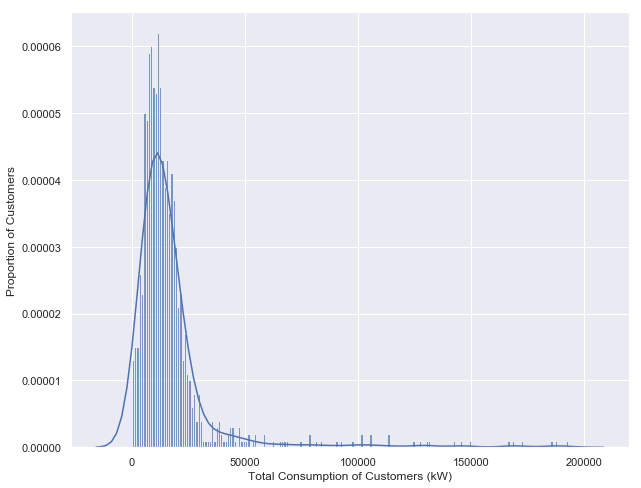

In [68]:
# Show the distribution of the total consumption in kWs of households by distplot
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(customer_consumption["Consumption"],bins=np.arange(np.around(customer_consumption["Consumption"].min()), customer_consumption["Consumption"].max()+1000, 1000), hist_kws = {'alpha' : 0.7}, ax=ax)
ax.set_xlabel('Total Consumption of Customers (kW)')
ax.set_ylabel('Proportion of Customers')

As suggested in the project proposal, household characteristics are important to determine the electricity consumption of the household, which can range widely among different households. 

Let's show how electricity consumption changes during different times of the year, which suggests to consider the time effects (for example, temperature depending on the time of the year) while analyzing the data.

In [39]:
data.sort_values(by=['Customer ID'], inplace=True)
data.reset_index(drop=True,inplace=True)
data

,Customer ID,Datetime,Consumption
0,1000,44244,0.223
1,1000,54037,0.113
2,1000,53629,0.024
3,1000,34744,0.515
4,1000,34743,0.544
5,1000,34742,1.019
6,1000,34741,1.339
7,1000,34740,0.487
8,1000,34739,0.546
9,1000,34738,1.833


In [44]:
# Show the consumption data for customer ID 1000
data_1000=data[data['Customer ID']==1000]
data_1000.sort_values(by='Datetime', inplace=True)
data_1000.reset_index(drop=True,inplace=True)
data_1000

,Customer ID,Datetime,Consumption
0,1000,19501,0.117
1,1000,19502,0.050
2,1000,19503,0.025
3,1000,19504,0.025
4,1000,19505,0.049
5,1000,19506,0.117
6,1000,19507,0.042
7,1000,19508,0.024
8,1000,19509,0.024
9,1000,19510,0.048


In [56]:
import datetime

#Label the days in the Day column starting with the first day of the experiment
data_1000['Day'] = data_1000['Datetime'].apply(lambda x: int(str(x)[:3])-194)
data_1000

,Customer ID,Datetime,Consumption,Day
0,1000,19501,0.117,1
1,1000,19502,0.050,1
2,1000,19503,0.025,1
3,1000,19504,0.025,1
4,1000,19505,0.049,1
5,1000,19506,0.117,1
6,1000,19507,0.042,1
7,1000,19508,0.024,1
8,1000,19509,0.024,1
9,1000,19510,0.048,1


Text(0.5, 0, 'Day of the Experiment')

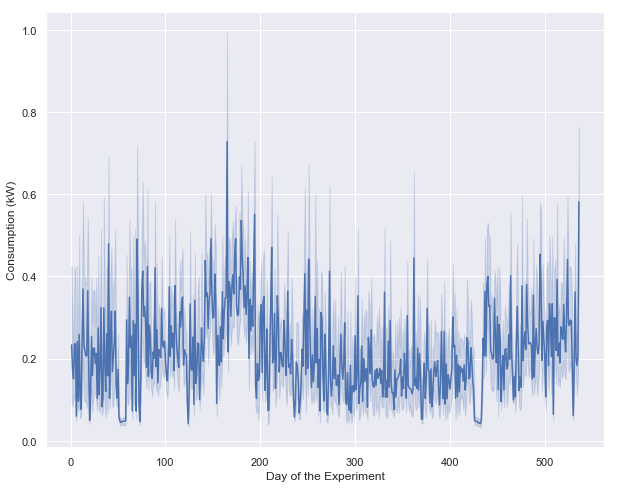

In [65]:
# Show the distribution of consumption in kWs over time for customer ID 1000
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=data_1000["Day"],y=data_1000["Consumption"], ax=ax)
ax.set_ylabel('Consumption (kW)')
ax.set_xlabel('Day of the Experiment')